In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

## Least Squares modelling via Row Reduction

In [2]:
## Normal Equation: (X'X) (Beta) = (X') * Y,  where Y is the dependent matrix and X the independent variable matrix
## Using Row reduction on the matrix formed by augmenting X'X and X'Y (i.e. matrix X'X|X'Y), we will get I|(Beta)

m = 10
n = 3


x = np.random.randn(m, n)  # independent variable matrix
y = np.random.randn(m, 1)  # dependent variable matrix


# Normal Equation
xtx = x.T @ x
xty = x.T @ y
normEQ = Matrix(np.concatenate([xtx, xty], axis=1))

solution = normEQ.rref()
solution = solution[0]
beta = solution[:,-1]    # <--------- last column

print("I|Beta:\n", np.array(solution), "\n\n")
print("Beta using RREF:\n", beta, "\n\n")

# comparing it to the beta computed using the left-inverse
beta_2 = np.linalg.inv(xtx) @ xty
print("Beta using Left-inverse:\n", beta_2, "\n\n")

# comparing it with beta computed using the python solver
beta_3 = np.linalg.solve(xtx, xty)
print("Beta using the python solver:\n", beta_3, "\n\n")

I|Beta:
 [[1 0 0 0.123991777728028]
 [0 1 0 0.209836987069265]
 [0 0 1 0.454794717969967]] 


Beta using RREF:
 Matrix([[0.123991777728028], [0.209836987069265], [0.454794717969967]]) 


Beta using Left-inverse:
 [[0.12399178]
 [0.20983699]
 [0.45479472]] 


Beta using the python solver:
 [[0.12399178]
 [0.20983699]
 [0.45479472]] 




## Calculating mean using least-square model fitting

beta =  [1.] 

Design vector:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 




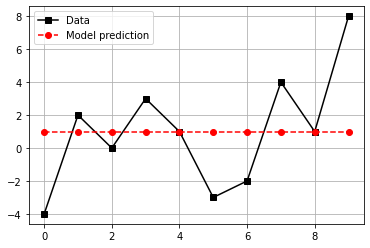

In [3]:
## If our vector A has the n values, and we want this vector to be represented by a vector x, 
## such that:                                    A = Beta * x
## In this simple equation, if we substitute x as a vector of ones,
## we can see that Beta will equal to the mean of all the values in the vector A

# data
data = np.array([-4, 2, 0, 3, 1, -3, -2, 4, 1, 8]).T  # column vector: Sum = 10, n = 10 => mean = 1
n = len(data)

# design vector
x = np.ones([n, 1])

# model fitting
beta = np.linalg.solve(x.T @ x, x.T @ data)
print("beta = ", beta, "\n\nDesign vector:\n", x, "\n\n")

# plotting
y_hat = x @ beta  # model predicted values

plt.plot(data, 'ks-', label = 'Data')
plt.plot(y_hat, 'ro--', label = 'Model prediction')

plt.legend()
plt.grid()
plt.show()
print("\n\n")

beta =  [0.33684211] 

Design vector:
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] 




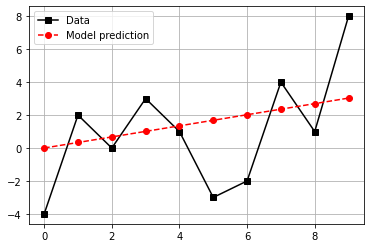

In [4]:
## Let's change the design vector
x = np.array([np.arange(0, n)]).T

# model fitting
beta = np.linalg.solve(x.T @ x, x.T @ data)
print("beta = ", beta, "\n\nDesign vector:\n", x, "\n\n")

# plotting
y_hat = x @ beta  # model predicted values

plt.plot(data, 'ks-', label = 'Data')
plt.plot(y_hat, 'ro--', label = 'Model prediction')

plt.legend()
plt.grid()
plt.show()
print("\n\n")

beta =  [-1.78181818  0.61818182] 

Design vector:
 [[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]] 




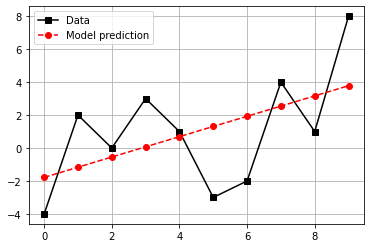

In [5]:
## Let's add an intercept term in the design vector
x = np.concatenate([np.ones([n, 1]), np.array([np.arange(0, n)]).T], axis = 1)

# model fitting
beta = np.linalg.solve(x.T @ x, x.T @ data)
print("beta = ", beta, "\n\nDesign vector:\n", x, "\n\n")

# plotting
y_hat = x @ beta  # model predicted values

plt.plot(data, 'ks-', label = 'Data')
plt.plot(y_hat, 'ro--', label = 'Model prediction')

plt.legend()
plt.grid()
plt.show()
print("\n\n")

beta =  [-1.05928854  0.07225574] 

Design vector:
 [[ 1.  0.]
 [ 1.  1.]
 [ 1.  4.]
 [ 1.  9.]
 [ 1. 16.]
 [ 1. 25.]
 [ 1. 36.]
 [ 1. 49.]
 [ 1. 64.]
 [ 1. 81.]] 




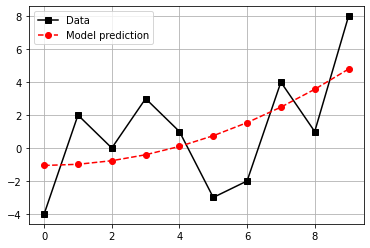

In [6]:
## Let's ntroduce non-linearity in the design vector (squared values)
x = np.concatenate([np.ones([n, 1]), np.array([np.arange(0, n)**2]).T], axis = 1)

# model fitting
beta = np.linalg.solve(x.T @ x, x.T @ data)
print("beta = ", beta, "\n\nDesign vector:\n", x, "\n\n")

# plotting
y_hat = x @ beta  # model predicted values

plt.plot(data, 'ks-', label = 'Data')
plt.plot(y_hat, 'ro--', label = 'Model prediction')

plt.legend()
plt.grid()
plt.show()
print("\n\n")

## Least-Squares modelling via QR Decomposition

In [7]:
##                         X . Beta  =  y
##  Normal Equation:     X'X . Beta  = X'y
##  QR Decompostion: (QR)'QR . Beta  = (QR)'y
##  =>                R'Q'QR . Beta  =  (QR)'y
##  =>                R' I R . Beta  =  (QR)'y
##  =>                   R'R . Beta  =  (QR)'y
##  =>          (R'R)^-1 R'R . Beta  =  (R'R)^-1 (QR)'y
##  =>                         Beta  =  (R'R)^-1 (QR)'y

m = 10
n = 3
X = np.random.randn(m, n)
y = np.random.randn(m, 1)

# QR Decomposition
Q, R = np.linalg.qr(X)
beta_1 = np.linalg.solve(R.T @ R, (Q @ R).T @ y)   # soln to the eqn: R'R . x = (QR)'y  => x = (R'R)^-1 (QR)' y

# comparing with the stamdard left inverse method
beta_2 = np.linalg.solve(X.T @ X, X.T @ y)
beta_2 = np.linalg.lstsq(X, y, rcond = None)[0]
print("Beta 1 = ", beta_1, "\n\nBeta 2 = ", beta_2, "\n\n")

Beta 1 =  [[0.1743793 ]
 [0.03681547]
 [0.40093302]] 

Beta 2 =  [[0.1743793 ]
 [0.03681547]
 [0.40093302]] 


